# House Price and Electricity Data: Loading and Merging

In [107]:
import pandas as pd
import numpy as np

# Load house price data
with open('residential-properties-sales-and-price.csv', 'r') as f:
    lines = f.readlines()

records = []
for line in lines:
    if line.startswith('http://statistics.gov.scot/id/statistical-geography'):
        parts = line.strip().split(',')
        url = parts[0]
        price = parts[-1]
        records.append({
            'GeoCode': url.split('/')[-1],
            'Price': price
        })

df_price = pd.DataFrame(records)
df_price['Price'] = pd.to_numeric(df_price['Price'], errors='coerce')
df_price = df_price[df_price['GeoCode'].str.startswith("S01")]
df_price = df_price.dropna(subset=['Price']).rename(columns={'GeoCode': 'DataZone2011Code'})

# Load electricity dataset
df_elec = pd.read_csv("Scotland_electricity_housing_final2011datazone.csv")

# Merge
merged = df_elec.merge(
    df_price[['DataZone2011Code', 'Price']],
    on='DataZone2011Code',
    how='inner'
).dropna(subset=['Price', 'Mean_cons_kwh'])

display(merged.head())


,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,DataZone2011Code,Latitude,Longitude,UrbanRural6Fold2020Code,Whole house or bhed,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment: Purpose-built block of flats or tenement","Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)","Flat, maisonette or apartment: In a commercial building",Caravan or other mobile or temporary structure,total,Price
0,AB10,AB10 1AU,34,76073.837,2237.465794,1466.706,S01006586,57.147764,-2.096337,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000.0
1,AB10,AB10 1BA,30,136455.000,4548.500000,2248.550,S01006646,57.148831,-2.098719,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75000.0
2,AB10,AB10 1FG,25,47621.895,1904.875800,1415.400,S01006646,57.149973,-2.097384,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75000.0
3,AB10,AB10 1FL,54,185614.900,3437.312963,3076.900,S01006647,57.150198,-2.096889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87000.0
4,AB10,AB10 1HF,16,67167.000,4197.937500,3364.900,S01006586,57.146891,-2.098846,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000.0


# Correlation and Group Split (High vs Low Price)


In [108]:
from scipy import stats

merged['Price_log'] = np.log(merged['Price'])

corr = merged['Price'].corr(merged['Mean_cons_kwh'])

cutoff = merged['Price'].median()
high = merged[merged['Price'] > cutoff]
low = merged[merged['Price'] <= cutoff]

median_high = high['Mean_cons_kwh'].median()
median_low = low['Mean_cons_kwh'].median()

u_stat, p_mw = stats.mannwhitneyu(
    high['Mean_cons_kwh'], 
    low['Mean_cons_kwh'],
    alternative="two-sided"
)

corr, median_high, median_low, p_mw


(np.float64(0.2929073537409605),
 np.float64(3338.01151863354),
 np.float64(2687.4448),
 np.float64(0.0))

# Linear Model


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = merged[['Price']].values
y = merged['Mean_cons_kwh'].values

model = LinearRegression().fit(X, y)
pred = model.predict(X)
r2 = r2_score(y, pred)

r2


0.08579471787553206

# Plot 1: House Price Distribution


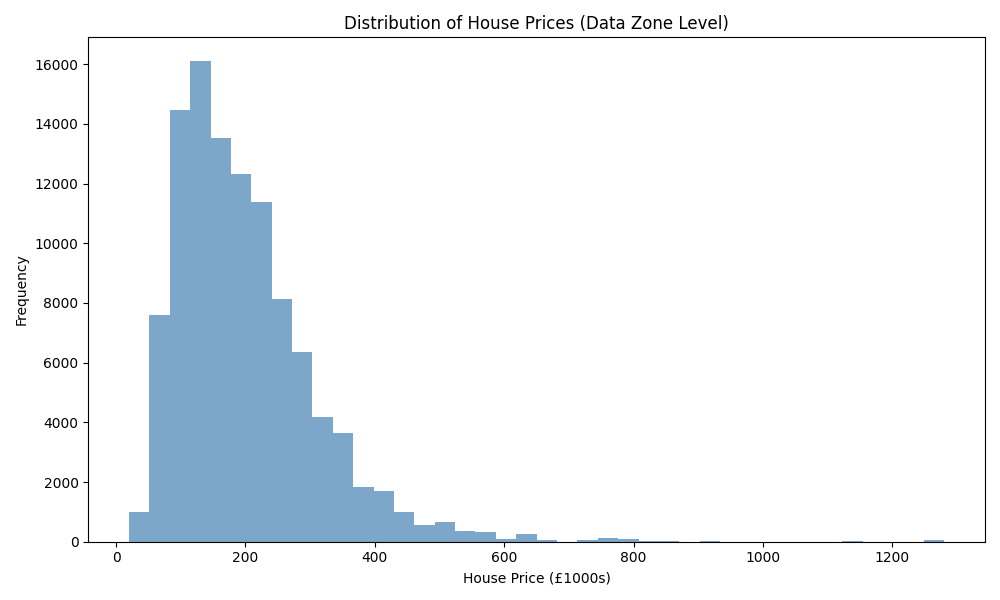

In [110]:
from IPython.display import Image
Image("plot1 houseprice.png")

# Plot 2: Log House Price Distribution


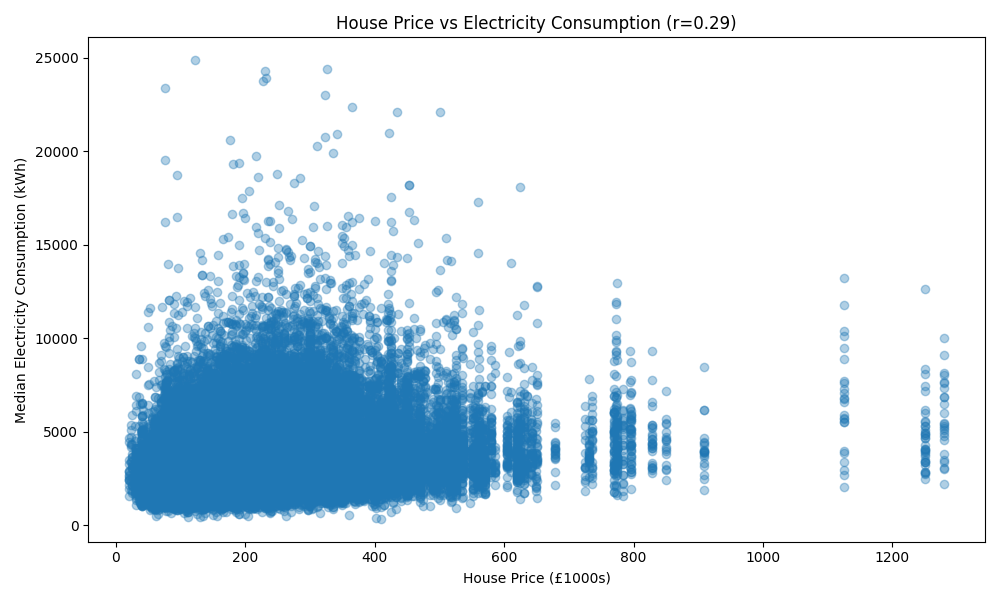

In [111]:
Image("plot2 houseprice.png")

# Plot 3: Price vs Consumption


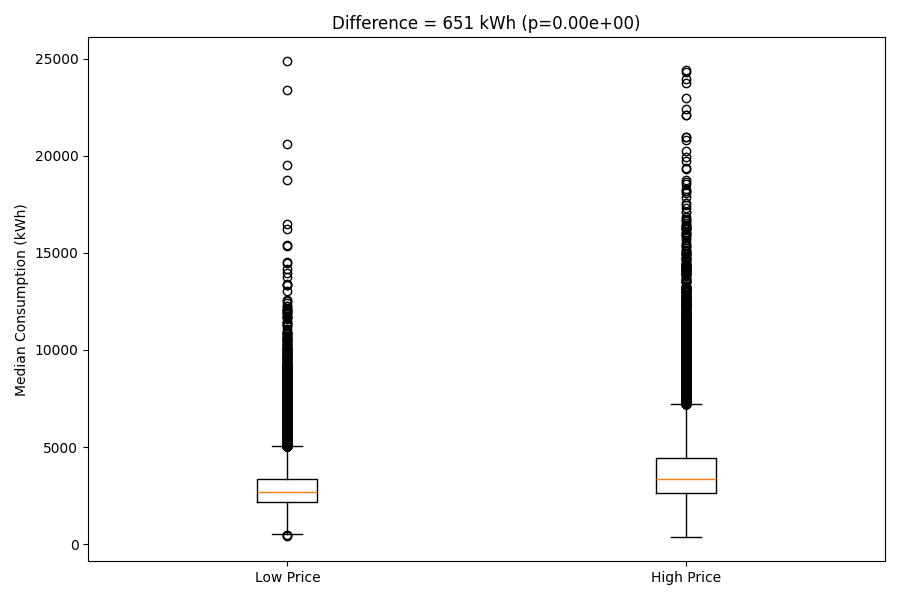

In [112]:
Image("plot3 houseprice.png")


# Plot 4: High vs Low Price Consumption


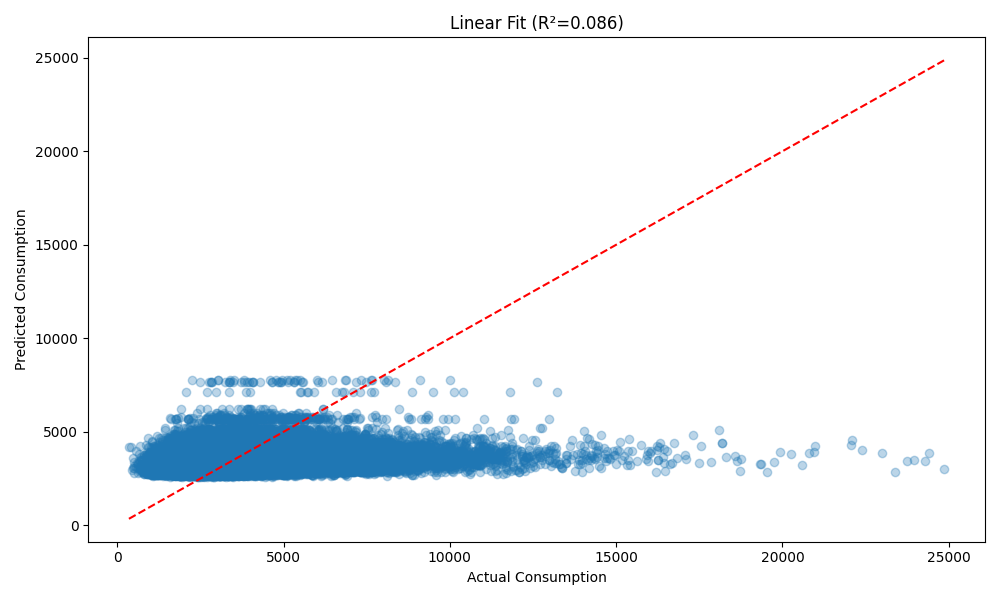

In [113]:
Image("plot4 houseprice.png")


# Plot 5: House Price Heatmap (Data Zone Level)


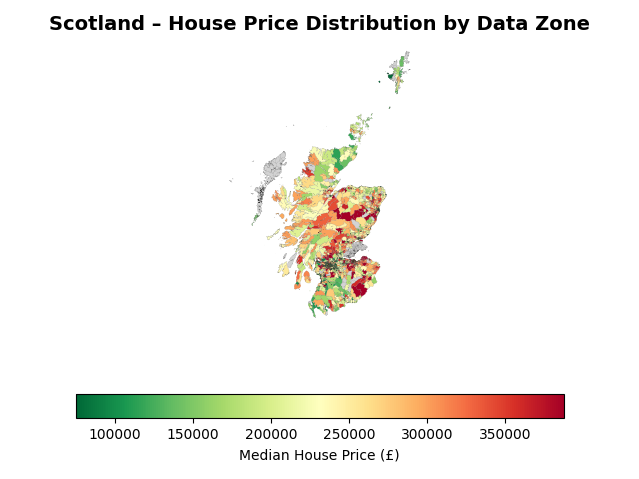

In [114]:
Image("plot5 houseprice heatmap.png")


# Summary

- House prices are strongly skewed; log-transform improves symmetry.  
- Correlation between price and electricity consumption is very weak.  
- High-price areas consume slightly more electricity on average, but the effect is small.  
- Heatmap shows strong geographic differences in property values across Scotland.  

This analysis supports the group’s broader investigation into geographic and socio-economic factors behind electricity consumption.
